In [334]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [335]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = '^MXX'
ipc = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [336]:
ipc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,43250.609375,42231.191406,42389.601562,43156.210938,214931900,43156.210938
2019-03-21,43362.910156,42851.910156,43121.898438,43251.191406,150021700,43251.191406
2019-03-22,43076.121094,42132.300781,43052.281250,42259.121094,148439300,42259.121094
2019-03-25,42757.789062,42276.039062,42292.691406,42703.378906,142967200,42703.378906
2019-03-26,43013.820312,42679.421875,42695.750000,42826.160156,147062600,42826.160156


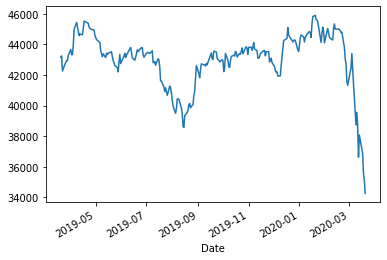

In [337]:
%matplotlib inline
ipc.Close.plot()

In [338]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [339]:
df = BBANDS(ipc,20)

In [340]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

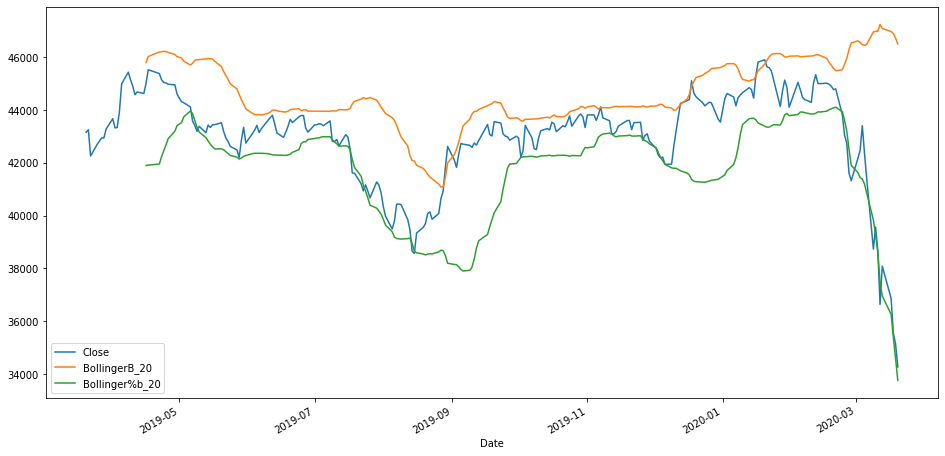

In [341]:
df2.plot(figsize = (16,8))

In [342]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

ipc.loc[(ipc['Close'] < a) & (ipc['Close'] > b), 'Comportamiento'] = 'Entre bandas'
ipc.loc[ipc['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
ipc.loc[ipc['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

ipc.loc[(ipc['Close'] < a) & (ipc['Close'] > b), 'Recomendacion'] = '-'
ipc.loc[ipc['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
ipc.loc[ipc['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

ipc["Recomendacion"] = ipc["Recomendacion"].fillna("-")
ipc["Comportamiento"] = ipc["Comportamiento"].fillna("Sin informacion")
        

    

In [343]:
pd.set_option('display.max_rows', None)

In [344]:
ipc[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,43156.210938,Sin informacion,-
2019-03-21,43251.191406,Sin informacion,-
2019-03-22,42259.121094,Sin informacion,-
2019-03-25,42703.378906,Sin informacion,-
2019-03-26,42826.160156,Sin informacion,-
2019-03-27,42947.550781,Sin informacion,-
2019-03-28,42942.230469,Sin informacion,-
2019-03-29,43281.281250,Sin informacion,-
2019-04-01,43672.058594,Sin informacion,-
